In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Interpolation

**Definition:**  Given a discrete set of values $y_i$ at locations $x_i$, an *interpolant* is a (piece-wise) continuous function $f(x)$ that passes exactly through the data (*i.e.* $f(x_i) = y_i$).

## Applications

 - Data filling
 - Function approximation
 - Fundamental component of other algorithms
   - Root finding (secant method)
   - Optimization, minima/maxima (successive parabolic interpolation)
   - Numerical integration and differentiation
   
## Polynomial Interpolation (1-D)

**Theorem:**  There is a *unique* polynomial of degree $N$, $P_N(x)$, that passes exactly through $N + 1$ values $y_1, y_2, \ldots, y_N, y_{N+1}$ at *distinct* points $x_1, x_2, \ldots, x_N, x_{N+1}$.

Consequence of the number of unknowns in $P_N(x)$.

#### Example 1: 2 Points

Given points are $(x_0, y_0)$ and $(x_1, y_1)$ which will lead to a line:

Define $P_1(x) = p_1 x + p_0$ and use the two points to find $p_0$ and $p_1$:

$$y_0 = p_1 x_0 + p_0 ~~~~ \Rightarrow ~~~~ p_0 = y_0 - p_1 x_0$$

$$y_1 = p_1 x_1 + p_0 ~~~~ \Rightarrow ~~~~ y_1 = p_1 x_1 + y_0 - p_1 x_0 ~~~~ \Rightarrow ~~~~ p_1 = \frac{y_1 - y_0}{x_1 - x_0} ~~~~ \Rightarrow ~~~~ p_0 = y_0 - \frac{y_1 - y_0}{x_1 - x_0} x_0$$

$$P_1(x) = \frac{y_1 - y_0}{x_1 - x_0} x + y_0 - \frac{y_1 - y_0}{x_1 - x_0} x_0 = \frac{y_1 - y_0}{x_1 - x_0} (x - x_0) + y_0$$

#### Example 2:  3 Points

Given points are $(x_0, y_0)$, $(x_1, y_1)$, and $(x_2, y_2)$ which will lead to quadratic polynomial:

Define $P_2(x) = p_0 x^2 + p_1 x + p_2$ leading to the equations

$$y_0 = p_2 x_0^2 + p_1 x_0 + p_0$$

$$y_1 = p_2 x_1^2 + p_1 x_1 + p_0$$

$$y_2 = p_2 x_2^2 + p_1 x_2 + p_0$$

This gets complicated quickly!

### Proof

Let 

$$P_N(x) = \sum^N_{n=0} p_n x^n $$
or
$$P_N(x) = p_0 + p_1 x + \cdots + p_{N - 1} x^{N - 1} + p_{N} x^N$$

and require $P_N(x_i) = y_i$ for $i=0,1,\ldots,N$ and $x_i \neq x_j ~~~ \forall i,j$.

Assume there exists another polynomial 

$$Q_N(x) = \sum^N_{n=0} q_n x^n$$

that passes through the same set of points such that $Q_N(x_i) = y_i$.  Now compute $T_N(x) = P_N(x) - Q_N(x)$:

We know that by assumption that $T_N(x_i) = 0$ but what about for all $x$?

$$T_N(x) = P_N(x) - Q_N(x) = \sum^N_{n=0} p_n x^n - q_n x^n = \sum^N_{n=0} (p_n - q_n) x^n$$

But if $T_N(x_i) = 0$ implies that $p_n - q_n = 0$ individually and therefore $P_N(x) = Q_N(x)$.

### Monomial Basis

Let $P_N(x) = \sum^N_{n=0} p_n x^n$, $P_N(x)$ can be represented by a *linear combination* of the monomials

$$1, x, x^2, x^3, \ldots, x^{N-1}, x^N$$ 

with weights 

$$p_0, p_1, p_2, p_3, \ldots, p_{N-1},~~ \text{and}~~ p_N$$

respectively.

#### Example 3:  Monomial Basis

Consider $P_3(x) = p_0 + p_1 x + p_2 x^2 + p_3 x^3$ with the four data points $(x_i, y_i), ~~ i = 0,1,2,3$.  We have four equations and four unknowns as expected:

$$P_3(x_0) = p_0 + p_1 x_0 + p_2 x_0^2 + p_3 x_0^3 = y_0$$

$$P_3(x_1) = p_0 + p_1 x_1 + p_2 x_1^2 + p_3 x_1^3 = y_1$$

$$P_3(x_2) = p_0 + p_1 x_2 + p_2 x_2^2 + p_3 x_2^3 = y_2$$

$$P_3(x_3) = p_0 + p_1 x_3 + p_2 x_3^2 + p_3 x_3^3 = y_3$$

Lets rewrite these as a matrix equation:

$$\vec{x} = \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ x_3 \end{bmatrix} ~~~~ \vec{y} = \begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ y_3 \end{bmatrix} ~~~~ \vec{p} = \begin{bmatrix} p_0 \\ p_1 \\ p_2 \\ p_3 \end{bmatrix}$$

Define the *Vandermonde* matrix as

$$
V = \begin{bmatrix} 
     1 & x_0 & x_0^2 & x_0^3 \\
     1 & x_1 & x_1^2 & x_1^3 \\
     1 & x_2 & x_2^2 & x_2^3 \\
     1 & x_3 & x_3^2 & x_3^3
\end{bmatrix}
$$

which allows us to write the system of linear equations as $V \vec{p} = \vec{y}$:

$$\begin{bmatrix} 
     1 & x_0 & x_0^2 & x_0^3 \\
     1 & x_1 & x_1^2 & x_1^3 \\
     1 & x_2 & x_2^2 & x_2^3 \\
     1 & x_3 & x_3^2 & x_3^3
\end{bmatrix} \begin{bmatrix} p_0 \\ p_1 \\ p_2 \\ p_3 \end{bmatrix} = \begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ y_3 \end{bmatrix}$$

Vandermonde matrices in general are defined as

$$V = \begin{bmatrix} 
    1      & x_0    & x_0^2  & \cdots & x_0^N  \\
    1      & x_1    & x_1^2  & \cdots & x_1^N  \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1      & x_m    & x_m^2  & \cdots & x_m^N  \\
\end{bmatrix}
$$

where $V$ is a $m \times n$ matrix with points $(x_i, y_i)$ for $i = 0, 1, 2, 3, \ldots m$ and for an order $N$ polynomial $P_N(x)$.

### Finding $p_i$

Finding the coefficients of $P_N(x)$ can be done by solving the system outlined above but there are other approaches:

 - Use `numpy.polyfit(x, y, x.shape[0] - 1)`
 - Use `numpy.vander(x, N=None)` to construct the matrix and use a    linear solver routine.
 - Use a Lagrangian basis
 
### Lagrangian Basis

Given $N+1$ points $(x_0,y_0), (x_1,y_1), \ldots, (x_{N},y_{N})$ again assuming the $x_i$ are all unique, the interpolating polynomial $P_N(x)$ can be written as

$$P_N(x) = \sum^{N}_{i=0} y_i \ell_i(x)$$

where 

$$\ell_i(x) = \prod^{N}_{j=0, j \neq i} \frac{x - x_i}{x_j - x_i} = \frac{x - x_0}{x_i - x_0} \frac{x - x_1}{x_i - x_1} \cdots \frac{x - x_{i-1}}{x_i - x_{i-1}}\frac{x - x_{i+1}}{x_i - x_{i+1}} \cdots \frac{x - x_{N}}{x_i - x_{N}}$$

#### Example 4:  $N = 1$ Lagrange Polynomial

Given 2 points $(x_0, y_0)$ and $(x_1, y_1)$ the Lagrange form of $P_N(x)$ is given by

$$\ell_0(x) = \frac{x - x_1}{x_0 - x_1}$$

and

$$\ell_1(x) = \frac{x - x_0}{x_1 - x_0}$$

so that

$$P_1(x) = \ell_0(x) \cdot y_0 + \ell_1(x) \cdot y_1 = \frac{x - x_1}{x_0 - x_1} \cdot y_0 + \frac{x - x_0}{x_1 - x_0} \cdot y_1$$

One important aspect of Lagrange polynomials to note is that the $\ell_i(x)$ functions are exactly 1 when $x  = x_i$ and that every other $\ell_j(x)$ where $j \neq i$ is 0.

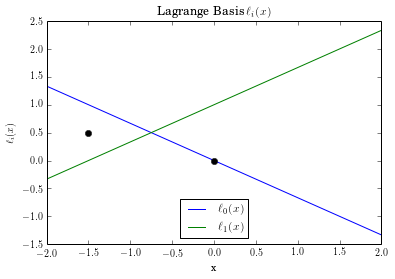

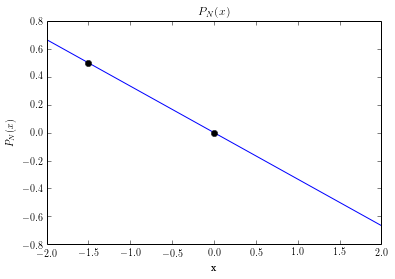

In [2]:
data = numpy.array([[-1.5, 0.5], [0.0, 0.0]])
N = data.shape[0] - 1
M = data.shape[0]
x = numpy.linspace(-2.0, 2.0, 100)

# ====================================================
# Compute the Lagrange basis (\ell_i(x))
lagrange_basis = numpy.ones((N + 1, x.shape[0]))
for i in xrange(N + 1):
    for j in xrange(N + 1):
        if i != j:
            lagrange_basis[i, :] *= (x - data[j, 0]) / (data[i, 0] - data[j, 0])

# Calculate full polynomial
P = numpy.zeros(x.shape[0])
for n in xrange(N + 1):
    P += lagrange_basis[n, :] * data[n, 1]

# ====================================================
# Plot individual basis functions
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
for i in xrange(N + 1):
    axes.plot(x, lagrange_basis[i, :], label="$\ell_{%s}(x)$" % i)
    axes.plot(data[i, 0], data[i, 1], 'ko')

axes.set_title("Lagrange Basis $\ell_i(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$\ell_i(x)$")
axes.legend(loc=8)

# Plot full polynomial P_N(x)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, P, label="$P_{%s}(x)$" % N)
for point in data:
    axes.plot(point[0], point[1], 'ko')
axes.set_title("$P_N(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$P_N(x)$")
    
plt.show()

#### Example 5:  Interpolate six points from $sin(\pi x)$

Use six points to approximate $\sin$ on the interval $x \in [-1, 1]$.  What is the behavior as $N \rightarrow \infty$?  Also plot the error between $f(x)$ and the interpolant $P_N(x)$.

#### Example 6: Runge's Function

Interpolate $f(x) = \frac{1}{1 + 25 x^2}$ using 6 points of your choosing on $x \in [-1, 1]$.

Try it with 11 points.

Keep increasing the number of points and see what happens.

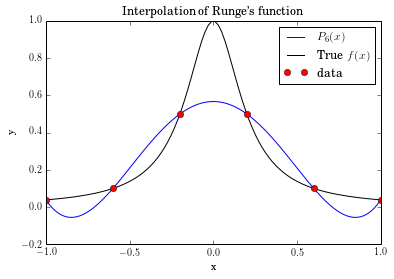

In [3]:
def f(x):
    return 1.0 / (1.0 + 25.0 * x**2)

x = numpy.linspace(-1, 1, 100)

data = numpy.empty((6, 2))
data[:, 0] = numpy.linspace(-1, 1, 6)
data[:, 1] = f(data[:, 0])
N = data.shape[0] - 1

# Calculate interpolant
lagrange_basis = numpy.ones((N + 1, x.shape[0]))
for i in xrange(N + 1):
    for j in xrange(N + 1):
        if i != j:
            lagrange_basis[i, :] *= (x - data[j, 0]) / (data[i, 0] - data[j, 0])

# Calculate full polynomial
P = numpy.zeros(x.shape[0])
for n in xrange(N + 1):
    P += lagrange_basis[n, :] * data[n, 1]
    
# Plot the results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, P, 'b', label="$P_6(x)$")
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(data[:, 0], data[:, 1], 'ro', label="data")
          
axes.set_title("Interpolation of Runge's function")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend(loc=1)

plt.show()


### Rules of Thumb

 - Avoid high-order interpolants when possible!  Keep increasing the number of points and see what happens.
 - Avoid extrapolation - Increase the range of $x$ in the above example and check how good the approximation is beyond our sampling interval

### Error Analysis

**Theorem:** Lagrange Remainder Theorem - Let $f(x) \in C^{N+1}[-1, 1], then

$$f(x) = P_N(x) + R_N(x)$

where $P_N(x)$ is the interpolating polynomial and

$$R_N(x) = Q(x) \frac{f^{(N+1)}(c)}{(N+1)!} ~~~~ \text{with}~~~~ c \in [-1,1]$$

and

$$Q(x) = (x-x_0)(x-x_1)\cdots(x-x_N).$$

A few things to note:
 - For Taylor's theorem note that $Q(x) = (x - x_0)^{N+1}$ and the error only vanishes at $x_0$.
 - For Lagrange's theorem the error vanishes at all $x_i$.
 - To minimize $R_N(x)$ requires minimizing $|Q(x)|$ for $x \in [-1, 1]$.

### Chebyshev Polynomials

*Chebyshev polynomials* $T_N(x)$ are another basis that can be used for interpolation.

First 5 polynomials
$$T_0(x) = 1$$

$$T_1(x) = x$$

$$T_2(x) = 2 x^2 - 1$$

$$T_3(x) = 4 x^3 - 3 x$$

$$T_4(x) = 8x^4 - 8x^2 + 1$$

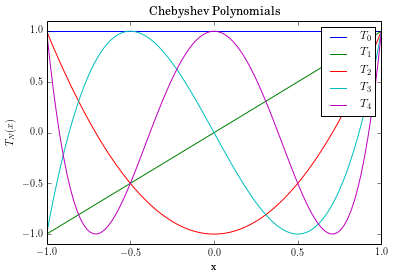

In [4]:
x = numpy.linspace(-1, 1, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, numpy.ones(x.shape), label="$T_0$")
axes.plot(x, x, label="$T_1$")
axes.plot(x, 2.0 * x**2 - 1.0, label="$T_2$")
axes.plot(x, 4.0 * x**3 - 3.0 * x, label="$T_3$")
axes.plot(x, 8.0 * x**4 - 8.0 * x**2 + 1, label="$T_4$")

axes.set_ylim((-1.1, 1.1))
axes.set_title("Chebyshev Polynomials")
axes.set_xlabel("x")
axes.set_ylabel("$T_N(x)$")
axes.legend(loc=1)

plt.show()

#### Properties:
1. Defined by a recurrence relation 

   $$T_k(x) = 2 x T_{k-1}(x) - T_{k-2}(x)$$
   
1. Leading coefficient of $x^N$ in $T_N(x)$ is $2^{N-1}$ for $N \geq 1$
1. Extreme values:

   $$|T_N(x)| \leq 1 ~~~~\text{for}~~~~~ -1 \leq x \leq 1$$
   
1. Minimax principle:  The polynomial

   $$T(x) = \frac{T_{N+1}(x)}{2^N}$$
   
   is a monic polynomial with the property that
   
   $$\max |T(x)| \leq \max |Q(X)| ~~~ \text{for} ~~~ x \in [-1, 1], ~~~~ \text{and}$$
   
   $$\max |T(x)| = \frac{1}{2^N}$$

#### Error Analysis Redux

Recall that in order to minimize the error with Lagrange's Theorem we needed to minimize $|Q(x)|$ for $x \in [-1, 1]$.  This implies that in order to minimize $R_N(x)$ with Chebyshev polynomials set $Q(x) = T(x)$.  We only know $Q(x)$ through its roots $x_0, x_1, \ldots, x_N$ so we will require that the points used (nodes) in the interpolation by the zeros of $T_{N+1}(x)$.

The zeros of $T_N(x)$ in the interval $[-1, 1]$ can be shown to satisfy

$$x_k = \cos\left( \frac{(2k - 1) \pi}{2 N} \right ) ~~~~~ \text{for}~~~~ k=0, 1, \ldots, N-1$$

These nodal points (sampling the function at these points) can be shown to minimize interpolation error.

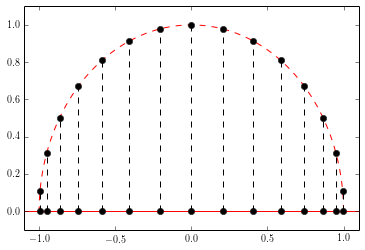

In [5]:
x = numpy.linspace(0, numpy.pi, 100)
N = 15

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(numpy.cos(x), numpy.sin(x), 'r--')
axes.plot(numpy.linspace(-1.1, 1.1, 100), numpy.zeros(x.shape), 'r')
for k in xrange(1, N + 1):
    location = [numpy.cos((2.0 * k - 1.0) * numpy.pi / (2.0 * N)),
                numpy.sin((2.0 * k - 1.0) * numpy.pi / (2.0 * N))]
    axes.plot(location[0], location[1], 'ko')
    axes.plot(location[0], 0.0, 'ko')
    axes.plot([location[0], location[0]], [0.0, location[1]], 'k--')
    
axes.set_xlim((-1.1, 1.1))
axes.set_ylim((-0.1, 1.1))
plt.show()

/Users/mandli/src/envs/claw/lib/python2.7/site-packages/numpy/polynomial/chebyshev.py:1761: RankWarning: The fit may be poorly conditioned
  warnings.warn(msg, pu.RankWarning)


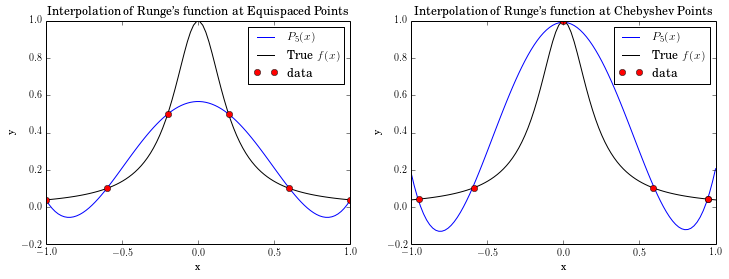

In [6]:
def f(x):
    return 1.0 / (1.0 + 25.0 * x**2)

# Parameters
x = numpy.linspace(-1, 1, 100)
num_points = 6

# ============================================================
#  Equidistant nodes
equidistant_data = numpy.empty((num_points, 2))
equidistant_data[:, 0] = numpy.linspace(-1, 1, num_points)
equidistant_data[:, 1] = f(equidistant_data[:, 0])
N = equidistant_data.shape[0] - 1

lagrange_basis = numpy.ones((N + 1, x.shape[0]))
for i in xrange(N + 1):
    for j in xrange(N + 1):
        if i != j:
            lagrange_basis[i, :] *= (x - equidistant_data[j, 0]) / (equidistant_data[i, 0] - equidistant_data[j, 0])

# Calculate full polynomial
P_lagrange = numpy.zeros(x.shape[0])
for n in xrange(N + 1):
    P_lagrange += lagrange_basis[n, :] * equidistant_data[n, 1]

# ============================================================
#  Chebyshev nodes
chebyshev_data = numpy.empty((num_points, 2))
chebyshev_data[:, 0] = numpy.cos((2.0 * numpy.arange(N + 1) - 1.0) * numpy.pi / (2.0 * N))
chebyshev_data[:, 1] = f(chebyshev_data[:, 0])

# Project data onto Chebyshev polynomials
coeff = numpy.polynomial.chebyshev.chebfit(chebyshev_data[:, 0], chebyshev_data[:, 1], N)

# Find needed Chebyshev polynomials
T = numpy.empty((N, x.shape[0]))
T[0, :] = numpy.ones(x.shape)
T[1, :] = x
for k in xrange(2, N):
    T[k, :] = 2.0 * x * T[k-1, :]- T[k-2, :]
    
# Could plot them here but actually just want to evaluate the polynomial at x
P_cheby = numpy.zeros(x.shape)
for k in xrange(N):
    P_cheby += T[k, :] * coeff[k]

# ============================================================
# Plot the results
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)

axes = fig.add_subplot(1, 2, 1)
axes.plot(x, P_lagrange, 'b', label="$P_%s(x)$" % N)
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(equidistant_data[:, 0], equidistant_data[:, 1], 'ro', label="data")
axes.set_title("Interpolation of Runge's function at Equispaced Points")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend(loc=1)

axes = fig.add_subplot(1, 2, 2)
axes.plot(x, P_cheby, 'b', label="$P_%s(x)$" % N)
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(chebyshev_data[:, 0], chebyshev_data[:, 1], 'ro', label="data")
          
axes.set_title("Interpolation of Runge's function at Chebyshev Points")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend(loc=1)


plt.show()